## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
'''
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

'''
for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with batch size = %d" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "Batch Size = %d" % batch_size
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with batch size = 2
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (

25000/25000 [==============================] - 90s 4ms/step - loss: 2.1992 - accuracy: 0.1898 - val_loss: 268.3850 - val_accuracy: 0.2099
Epoch 47/50
25000/25000 [==============================] - 90s 4ms/step - loss: 2.2028 - accuracy: 0.1831 - val_loss: 1375.1165 - val_accuracy: 0.2318
Epoch 48/50
25000/25000 [==============================] - 90s 4ms/step - loss: 2.2026 - accuracy: 0.1875 - val_loss: 518.8283 - val_accuracy: 0.2403
Epoch 49/50
25000/25000 [==============================] - 90s 4ms/step - loss: 2.2052 - accuracy: 0.1844 - val_loss: 509.8192 - val_accuracy: 0.2060
Epoch 50/50
25000/25000 [==============================] - 90s 4ms/step - loss: 2.2009 - accuracy: 0.1873 - val_loss: 524.5764 - val_accuracy: 0.2188
Experiment with batch size = 16
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________

3125/3125 [==============================] - 12s 4ms/step - loss: 1.1781 - accuracy: 0.5815 - val_loss: 1.4094 - val_accuracy: 0.5183
Epoch 43/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1698 - accuracy: 0.5854 - val_loss: 1.4058 - val_accuracy: 0.5168
Epoch 44/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1774 - accuracy: 0.5847 - val_loss: 1.4409 - val_accuracy: 0.5102
Epoch 45/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1720 - accuracy: 0.5858 - val_loss: 1.3778 - val_accuracy: 0.5213
Epoch 46/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1698 - accuracy: 0.5844 - val_loss: 1.4096 - val_accuracy: 0.5191
Epoch 47/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.1657 - accuracy: 0.5861 - val_loss: 1.3952 - val_accuracy: 0.5229
Epoch 48/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1632 - accuracy: 0.5882 - val_loss: 1.3857 - val_accurac

1563/1563 [==============================] - 9s 5ms/step - loss: 0.9194 - accuracy: 0.6721 - val_loss: 1.6035 - val_accuracy: 0.4951
Epoch 39/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9192 - accuracy: 0.6727 - val_loss: 1.4667 - val_accuracy: 0.5178
Epoch 40/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9126 - accuracy: 0.6720 - val_loss: 1.5508 - val_accuracy: 0.5089
Epoch 41/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9052 - accuracy: 0.6763 - val_loss: 1.4740 - val_accuracy: 0.5233
Epoch 42/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8983 - accuracy: 0.6805 - val_loss: 1.5298 - val_accuracy: 0.4975
Epoch 43/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8913 - accuracy: 0.6812 - val_loss: 1.4662 - val_accuracy: 0.5210
Epoch 44/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8866 - accuracy: 0.6853 - val_loss: 1.4941 - val_accuracy: 0.52

391/391 [==============================] - 2s 6ms/step - loss: 0.5371 - accuracy: 0.8064 - val_loss: 2.0583 - val_accuracy: 0.4786
Epoch 36/50
391/391 [==============================] - 2s 6ms/step - loss: 0.5128 - accuracy: 0.8155 - val_loss: 2.1705 - val_accuracy: 0.4826
Epoch 37/50
391/391 [==============================] - 2s 6ms/step - loss: 0.5048 - accuracy: 0.8177 - val_loss: 2.2695 - val_accuracy: 0.4597
Epoch 38/50
391/391 [==============================] - 2s 6ms/step - loss: 0.4961 - accuracy: 0.8210 - val_loss: 2.1551 - val_accuracy: 0.4785
Epoch 39/50
391/391 [==============================] - 2s 6ms/step - loss: 0.4800 - accuracy: 0.8282 - val_loss: 2.0605 - val_accuracy: 0.5086
Epoch 40/50
391/391 [==============================] - 2s 6ms/step - loss: 0.4690 - accuracy: 0.8303 - val_loss: 2.1673 - val_accuracy: 0.4892
Epoch 41/50
391/391 [==============================] - 2s 6ms/step - loss: 0.4593 - accuracy: 0.8334 - val_loss: 2.1358 - val_accuracy: 0.4977
Epoch 42/50

196/196 [==============================] - 1s 7ms/step - loss: 0.4599 - accuracy: 0.8373 - val_loss: 2.1626 - val_accuracy: 0.4670
Epoch 33/50
196/196 [==============================] - 1s 7ms/step - loss: 0.4473 - accuracy: 0.8420 - val_loss: 2.2250 - val_accuracy: 0.4746
Epoch 34/50
196/196 [==============================] - 1s 7ms/step - loss: 0.4169 - accuracy: 0.8551 - val_loss: 2.1848 - val_accuracy: 0.4761
Epoch 35/50
196/196 [==============================] - 1s 8ms/step - loss: 0.4104 - accuracy: 0.8539 - val_loss: 2.3164 - val_accuracy: 0.4657
Epoch 36/50
196/196 [==============================] - 1s 8ms/step - loss: 0.3902 - accuracy: 0.8612 - val_loss: 2.3950 - val_accuracy: 0.4690
Epoch 37/50
196/196 [==============================] - 1s 7ms/step - loss: 0.3836 - accuracy: 0.8624 - val_loss: 2.3765 - val_accuracy: 0.4875
Epoch 38/50
196/196 [==============================] - 1s 7ms/step - loss: 0.3644 - accuracy: 0.8702 - val_loss: 2.3197 - val_accuracy: 0.4848
Epoch 39/50

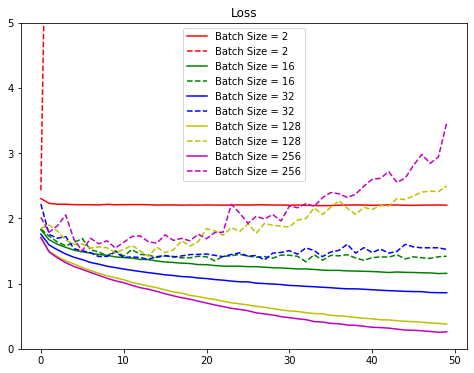

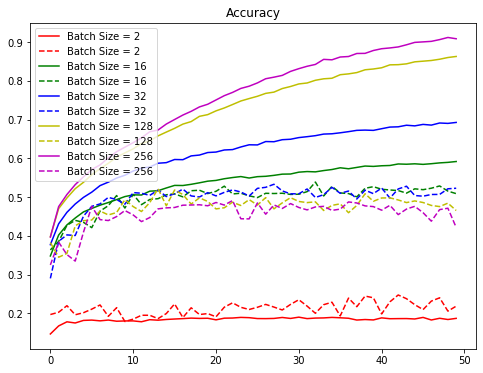

'\n\nplt.plot(range(len(train_loss)), train_loss, label="train loss")\nplt.plot(range(len(valid_loss)), valid_loss, label="valid loss")\nplt.legend()\nplt.title("Loss")\nplt.show()\n\nplt.plot(range(len(train_acc)), train_acc, label="train accuracy")\nplt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")\nplt.legend()\nplt.title("Accuracy")\nplt.show()\n'

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
'''

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()
'''